<a href="https://colab.research.google.com/github/hylabot/Atron_5205/blob/main/Week_02_NASA_Exoplanet_Archive_data_explorer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import astropy.io.ascii
import astropy.constants as ac
import astropy.units as u

In [2]:
# Load the drive helper and mount
from google.colab import drive

# This will prompt for authroities
drive.mount("/content/drive/")

Mounted at /content/drive/


In [3]:
# Grabbing file from drive
tab = astropy.io.ascii.read("/content/drive/MyDrive/Astron_5205/PS_2025.01.16_06.39.23.csv")

In [4]:
# Printing tab column names
print(tab.colnames)

['pl_name', 'hostname', 'default_flag', 'sy_snum', 'sy_pnum', 'discoverymethod', 'disc_year', 'disc_facility', 'soltype', 'pl_controv_flag', 'pl_refname', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_rade', 'pl_radeerr1', 'pl_radeerr2', 'pl_radelim', 'pl_radj', 'pl_radjerr1', 'pl_radjerr2', 'pl_radjlim', 'pl_bmasse', 'pl_bmasseerr1', 'pl_bmasseerr2', 'pl_bmasselim', 'pl_bmassj', 'pl_bmassjerr1', 'pl_bmassjerr2', 'pl_bmassjlim', 'pl_bmassprov', 'pl_orbeccen', 'pl_orbeccenerr1', 'pl_orbeccenerr2', 'pl_orbeccenlim', 'pl_insol', 'pl_insolerr1', 'pl_insolerr2', 'pl_insollim', 'pl_eqt', 'pl_eqterr1', 'pl_eqterr2', 'pl_eqtlim', 'ttv_flag', 'st_refname', 'st_spectype', 'st_teff', 'st_tefferr1', 'st_tefferr2', 'st_tefflim', 'st_rad', 'st_raderr1', 'st_raderr2', 'st_radlim', 'st_mass', 'st_masserr1', 'st_masserr2', 'st_masslim', 'st_met', 'st_meterr1', 'st_meterr2', 'st_metlim', 'st_metratio', 'st_logg', 'st

In [5]:
# Create a dictionary of planet data
planet_data = {
    'Planet': ['Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter', 'Saturn', 'Uranus', 'Neptune'],
    'Mass (Earth masses)': [0.055, 0.815, 1.000, 0.107, 317.8, 95.2, 14.5, 17.1],
    'Radius (Earth radii)': [0.383, 0.950, 1.000, 0.532, 11.21, 9.45, 4.01, 3.88],
    'Period (days)': [88.0, 224.7, 365.2, 687.0, 4331, 10747, 30589, 59800],
    'Semi-major axis (AU)': [0.387, 0.723, 1.000, 1.524, 5.203, 9.537, 19.191, 30.069],
    'Average color': ['#E5E5E5', '#877882', '#1E90FF', '#BC2732', '#FFA500', '#C4B08B', '#ADD8E6', '#00008B']
}

# Create a pandas DataFrame from the dictionary
planet_df = pd.DataFrame(planet_data)


In [17]:
# Making line
p_arr = 10.0**(np.arange(8.5)-.5) * u.day

r_p_arr = (3 * (p_arr / (365 * u.day))** 0.5)** 0.5 * u.earthRad


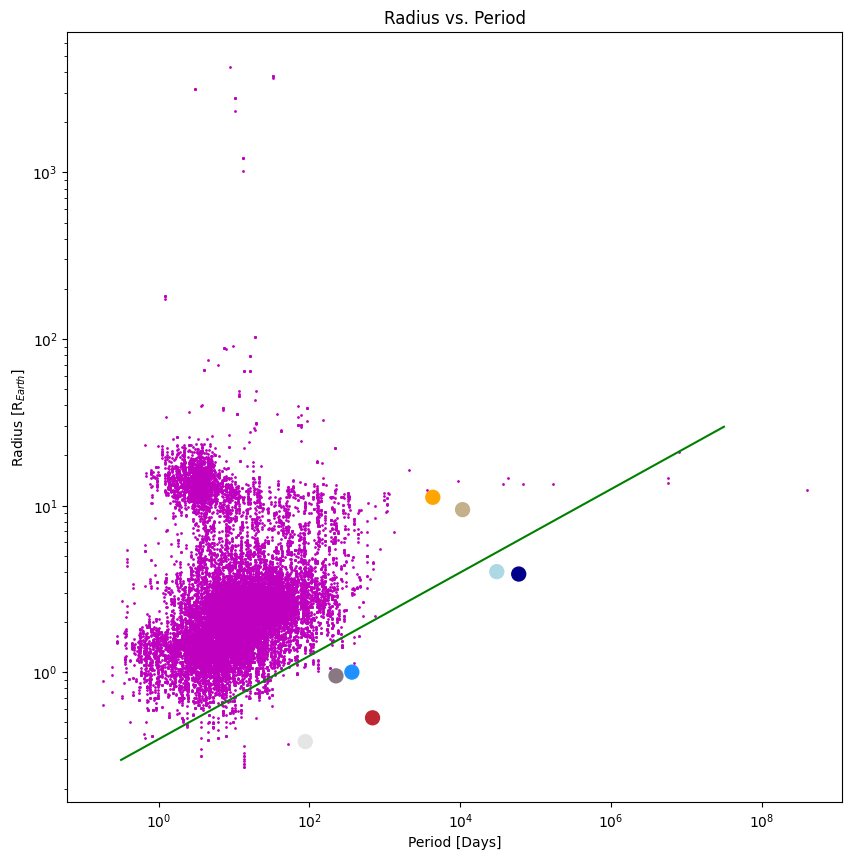

In [18]:
# Set figure size
plt.figure(figsize=(10, 10))
plt.tight_layout()

# Plot x and y, adjust size of data points, make the data points magenta
plt.scatter(tab["pl_orbper"], tab["pl_radj"]*u.jupiterRad.to(u.earthRad), s=1, c="m" )
plt.scatter(planet_df["Period (days)"], planet_df["Radius (Earth radii)"], s=100, c=planet_df["Average color"])

# Line showing where radial velocity is sensitive (above) and not sensitive (below)
plt.plot(p_arr.value, r_p_arr.decompose().to(u.earthRad), color="g")

# Set the scale for the x and y axes
plt.xscale("log")
plt.yscale("log")

# Label x and y axes
plt.xlabel("Period [Days]")
plt.ylabel(r"Radius [R$_{Earth}$]")

# Add title
plt.title("Radius vs. Period")

plt.show()

## 1, How about Mass-Period plot, Mass-Semi-major axis plot, etc? How different are they and why?


## 2, Overplot solar system planets on the above plot?

## 3, Research on the state-of-the-art performance of each detection technique and overplot the sensitivity line. An example of RV is given below.

## $K = \frac{m_p}{m_\ast}\cdot\sqrt{\frac{Gm_\ast}{a}}\cdot\sin i$

## Assuming an edge-on orbit, for which $i$ is 90 degree, rearrange the equation to be:

## $m_p = K \cdot m_\ast \cdot \sqrt{\frac{a}{Gm_\ast}}$

## For a K value of 0.5 m/s, which is the state-of-the-art performance, the mass sensitivity is as follows for a range of semi major axis $a$, assuming 0.5 solar mass:

In [ ]:
# Creating line
sma_arr = 10.0**(np.arange(8)-2.5) * u.AU

m_p_arr = 0.5 * u.meter / u.second * 0.5 * u.solMass * np.sqrt(sma_arr / ac.G / (0.5 * u.solMass))



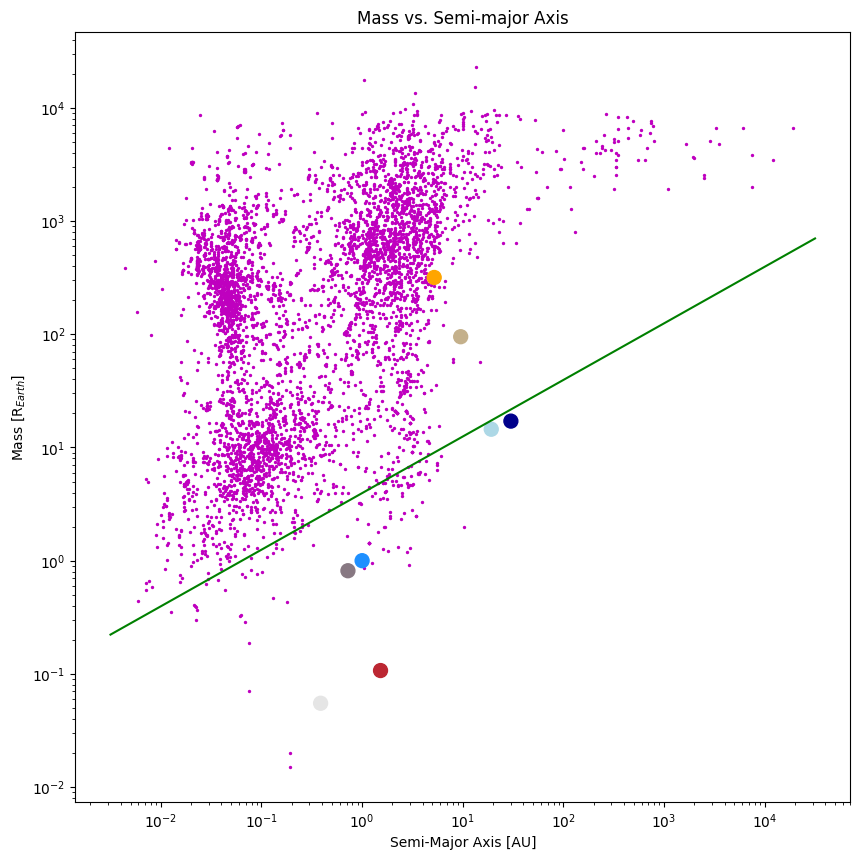

In [ ]:
# Set figure size
plt.figure(figsize=(10, 10))
plt.tight_layout()

# Plot x and y, adjust data point size and make them magenta
plt.scatter(tab["pl_orbsmax"], tab["pl_bmasse"], c="m", s=2)
plt.scatter(planet_df["Semi-major axis (AU)"], planet_df["Mass (Earth masses)"], s=100, c=planet_df["Average color"])

# Line showing where radial velocity is sensitive (above) and not sensitive (below)
plt.plot(sma_arr.value, m_p_arr.decompose().to(u.earthMass), color="g")

# Scale x and y axes
plt.xscale("log")
plt.yscale("log")

# Add label to x and y axes
plt.xlabel("Semi-Major Axis [AU]")
plt.ylabel(r"Mass [R$_{Earth}$]")

# Add title
plt.title("Mass vs. Semi-major Axis")

plt.show()

## You may think about the conversin between mass and radius  when considering the sensitivity of other detection techniques.

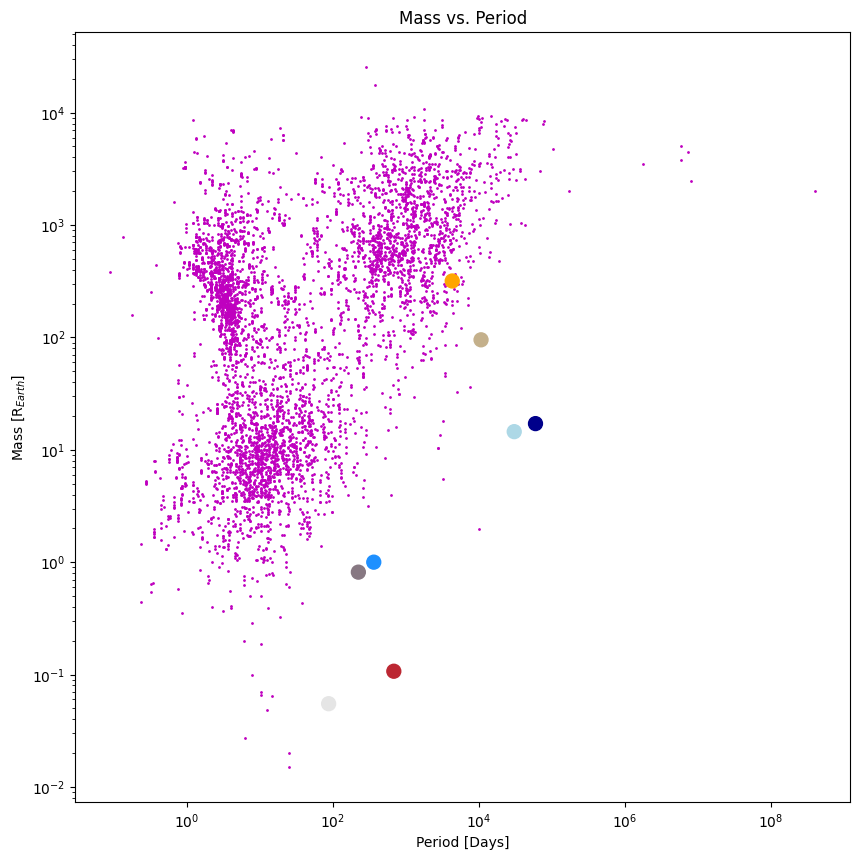

In [ ]:
# Set figure size
plt.figure(figsize=(10, 10))
plt.tight_layout()

# Plot x and y, adjust size of data points, make the data points magenta
plt.scatter(tab["pl_orbper"], tab["pl_bmasse"], s=1, c="m" )
plt.scatter(planet_df["Period (days)"], planet_df["Mass (Earth masses)"], s=100, c=planet_df["Average color"])

# Set the scale for the x and y axes
plt.xscale("log")
plt.yscale("log")

# Label x and y axes
plt.xlabel("Period [Days]")
plt.ylabel(r"Mass [R$_{Earth}$]")

# Add title
plt.title("Mass vs. Period")

plt.show()

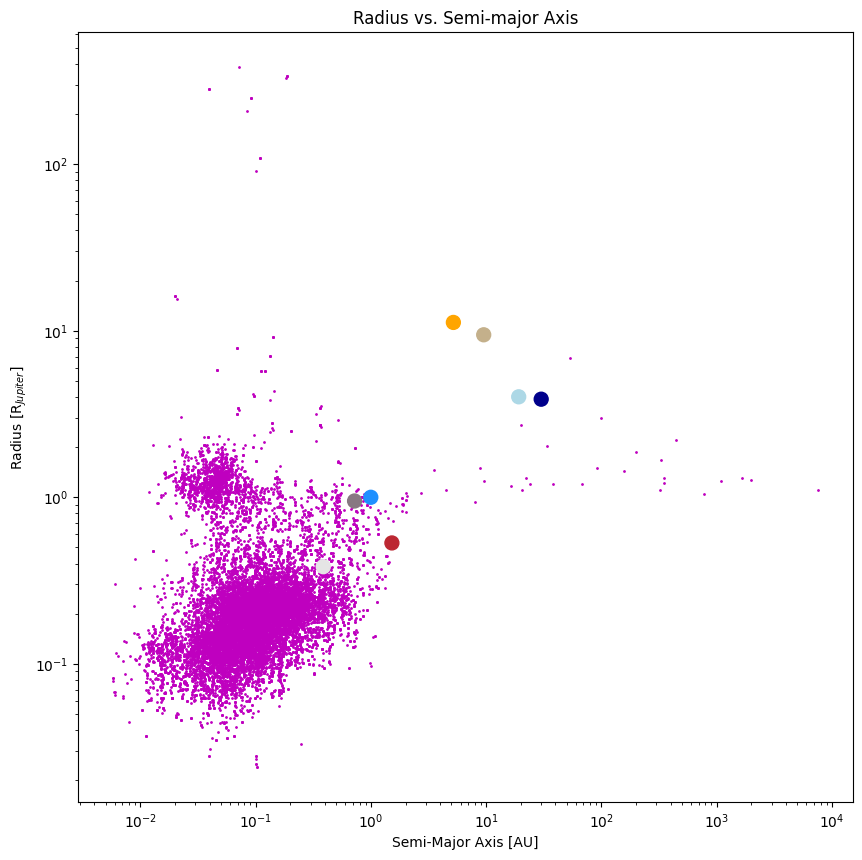

In [ ]:
# Set figure size
plt.figure(figsize=(10, 10))
plt.tight_layout()

# Plot x and y, adjust size of data points, make the data points magenta
plt.scatter(tab["pl_orbsmax"], tab["pl_radj"], s=1, c="m" )
plt.scatter(planet_df["Semi-major axis (AU)"], planet_df["Radius (Earth radii)"], s=100, c=planet_df["Average color"])

# Set the scale for the x and y axes
plt.xscale("log")
plt.yscale("log")

# Label x and y axes
plt.xlabel("Semi-Major Axis [AU]")
plt.ylabel(r"Radius [R$_{Jupiter}$]")

# Add title
plt.title("Radius vs. Semi-major Axis")

plt.show()